In [24]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
import random
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [25]:
rootDir = './animals-dataset'
trainingDir = rootDir + '/training'

In [26]:
batch_size = 32
img_height = 256
img_width = 256

In [43]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    trainingDir,
    validation_split=0.2,
    subset="training",
    seed=512,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation="bilinear"
)

Found 5000 files belonging to 10 classes.
Using 4000 files for training.


In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    trainingDir,
    validation_split=0.2,
    subset="validation",
    seed=512,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation="bilinear"
)

Found 5000 files belonging to 10 classes.
Using 1000 files for validation.


In [45]:
class_names = train_ds.class_names
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elefant', 'horse', 'sheep', 'spider', 'squirrel']


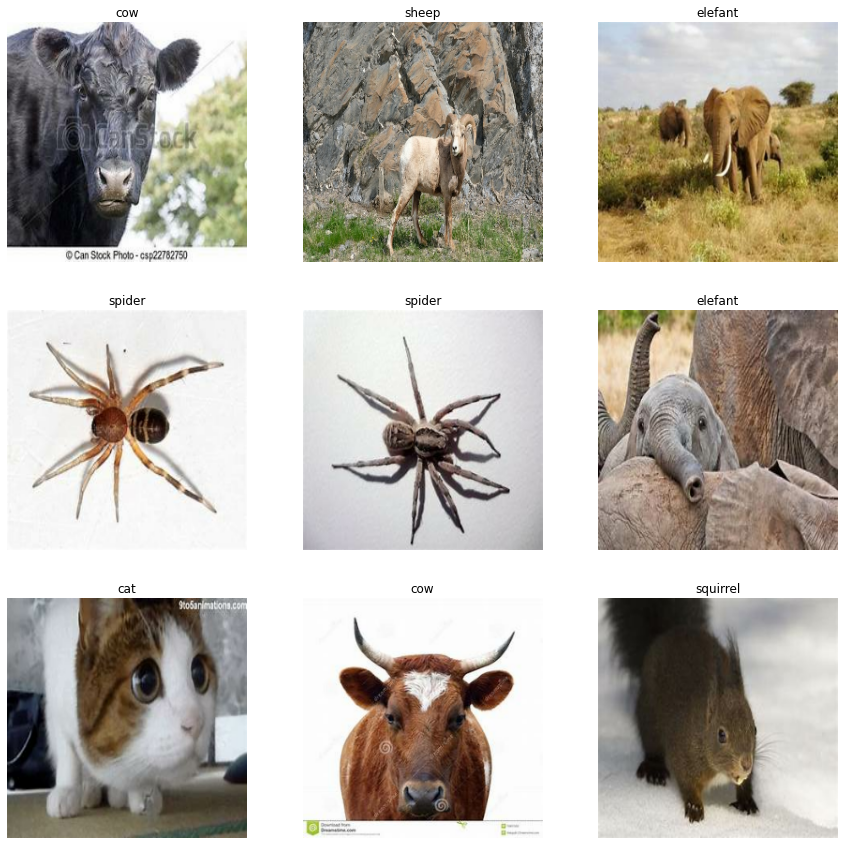

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
num_classes = 10

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [22]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [23]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)


Epoch 1/5
125/125 [==============================] - 46s 370ms/step - loss: 2.1425 - accuracy: 0.2138 - val_loss: 1.8944 - val_accuracy: 0.3510
Epoch 2/5
125/125 [==============================] - 42s 337ms/step - loss: 1.6759 - accuracy: 0.4072 - val_loss: 1.7091 - val_accuracy: 0.4150
Epoch 3/5
125/125 [==============================] - 41s 331ms/step - loss: 1.3197 - accuracy: 0.5545 - val_loss: 1.7529 - val_accuracy: 0.4040
Epoch 4/5
125/125 [==============================] - 41s 332ms/step - loss: 0.9994 - accuracy: 0.6708 - val_loss: 2.1143 - val_accuracy: 0.3730
Epoch 5/5
125/125 [==============================] - 41s 329ms/step - loss: 0.7372 - accuracy: 0.7623 - val_loss: 2.4408 - val_accuracy: 0.3740
